In [39]:
# Alexander LUI Decision Tree Classifier Homework 

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import tree


In [40]:
# Data Exploration

# Display first 5 rows
df_loan.head()

# Display last 5 rows
df_loan.tail()

# Get dataset information
df_loan.info()

# Describe numerical features
df_loan.describe()

# List all columns
df_loan.columns

# Check unique values in categorical columns
for col in df_loan.select_dtypes(include=["object"]).columns:
    print(f"{col} → {df_loan[col].unique()[:10]}")
    print("-" * 40)

# Check correlation between numeric features
df_loan.corr(numeric_only=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1004 non-null   int64 
 1   last_payment     1004 non-null   int64 
 2   credit_score     1004 non-null   int64 
 3   house_number     1004 non-null   int64 
 4   sum              1004 non-null   int64 
 5   result           1004 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.2+ KB
result → ['yes' 'No']
----------------------------------------


,initial_payment,last_payment,credit_score,house_number,sum
initial_payment,1.000000,-0.013536,-0.009421,0.071100,0.050698
last_payment,-0.013536,1.000000,-0.000805,0.057410,0.213237
credit_score,-0.009421,-0.000805,1.000000,0.034885,0.068387
house_number,0.071100,0.057410,0.034885,1.000000,0.412303
sum,0.050698,0.213237,0.068387,0.412303,1.000000


In [41]:
# Import dataset

# Read Loan Repayment dataset
df_loan = pd.read_csv("loans_Dataset.csv")

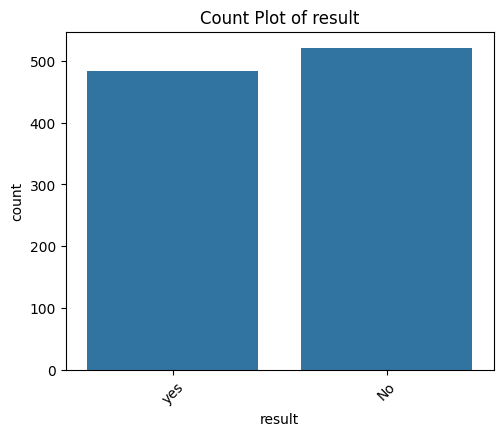

In [42]:
# Bar charts for categorical columns
categorical_cols = df_loan.select_dtypes(include=["object"]).columns

plt.figure(figsize=(14, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df_loan, x=col)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

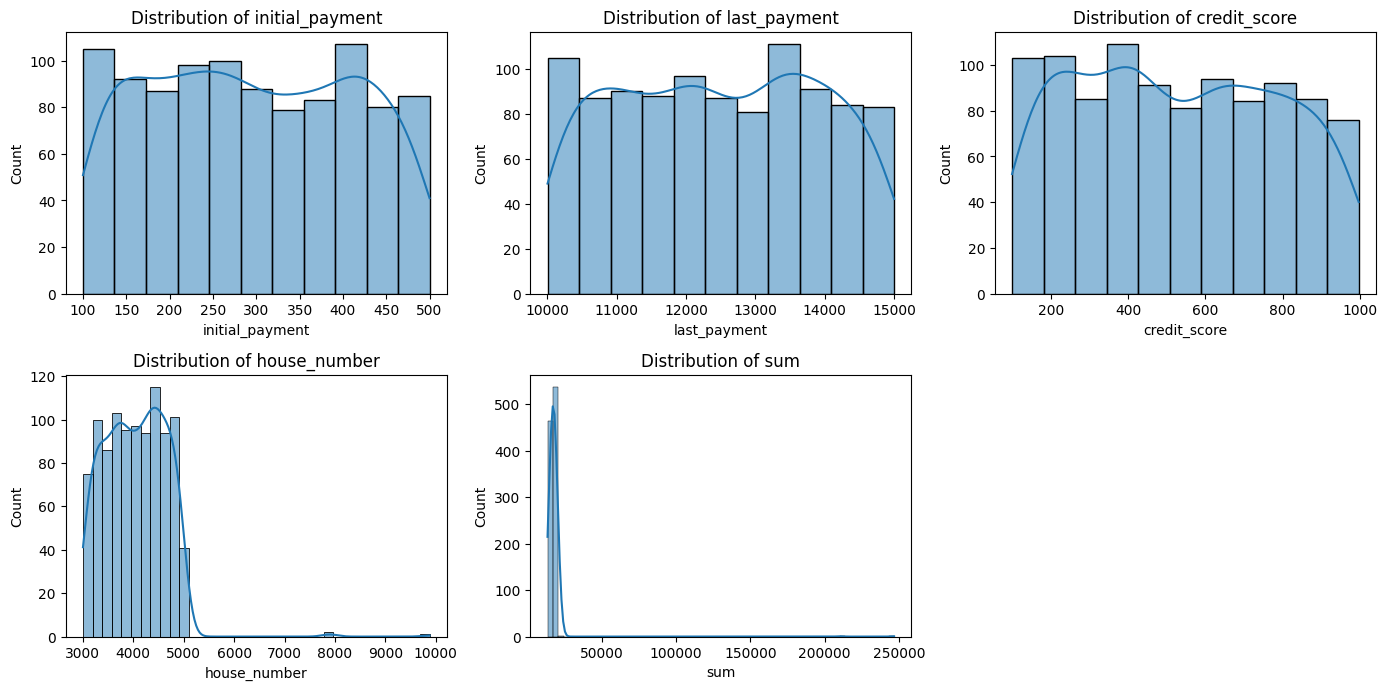

In [43]:
# Distribution plots for numerical features
numeric_cols = df_loan.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_loan[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

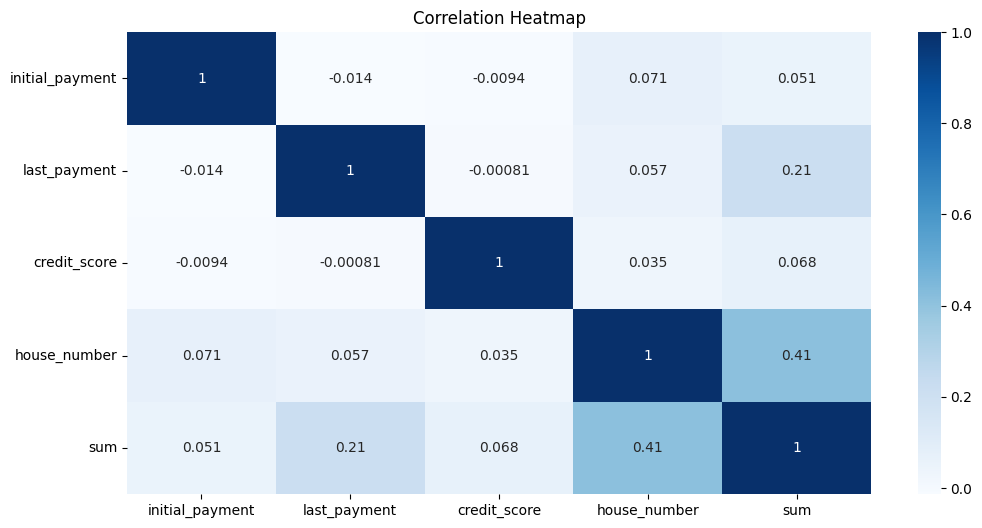

In [44]:
# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_loan.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

In [45]:
# Preprocessing

# Make a copy of the dataset
df_clean = df_loan.copy()

# Display shape before cleaning
df_loan.shape


(1004, 6)

In [46]:

# Remove duplicate rows (if any)
df_clean.drop_duplicates(inplace=True)

# Display shape after cleaning
df_clean.shape

(1004, 6)

In [47]:
# Identify numeric & categorical columns
numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns

# Fill numeric missing values with mean
for col in numeric_cols:
    df_clean[col].fillna(df_clean[col].mean(), inplace=True)

# Fill categorical missing values with mode
for col in categorical_cols:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

# Verify no missing values left
df_clean.isnull().sum()

C:\Users\luijo\AppData\Local\Temp\ipykernel_3928\2930390506.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)
C:\Users\luijo\AppData\Local\Temp\ipykernel_3928\2930390506.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



initial_payment    0
last_payment       0
credit_score       0
house_number       0
sum                0
result             0
dtype: int64

In [48]:
# Encode target column "result"

label_encoder = LabelEncoder()
df_clean['result'] = label_encoder.fit_transform(df_clean['result'])

# Separate features and target

X = df_clean.drop(columns=['result'])
y = df_clean['result']

# Normalize data

scaler = StandardScaler()

X_scaled = X.copy()
X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [49]:
# Create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2,      # 80% train, 20% test
    random_state=42,    # for reproducibility
    stratify=y          # keep class balance
)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((803, 5), (201, 5), (803,), (201,))

In [50]:
# Modeling

# Initialize Decision Tree classifier
classifier = DecisionTreeClassifier(
    criterion='entropy',   # same as typical examples
    random_state=42
)

# Fit model on training data
classifier.fit(X_train, y_train)

# Predict on test set
y_pred = classifier.predict(X_test)


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        97

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201

F1 Score: 1.0


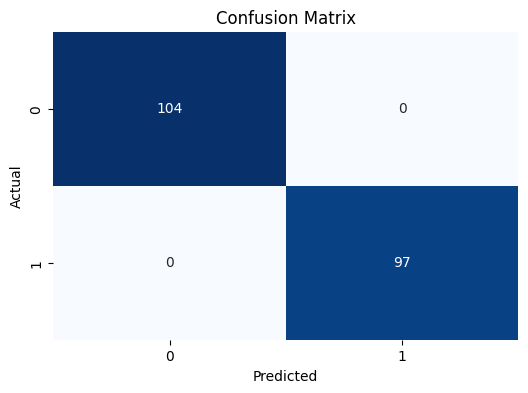

In [51]:
# Evaluation

accuracy = accuracy_score(y_test, y_pred)
accuracy

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Compute f1 scores
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


# Compute confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    cf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


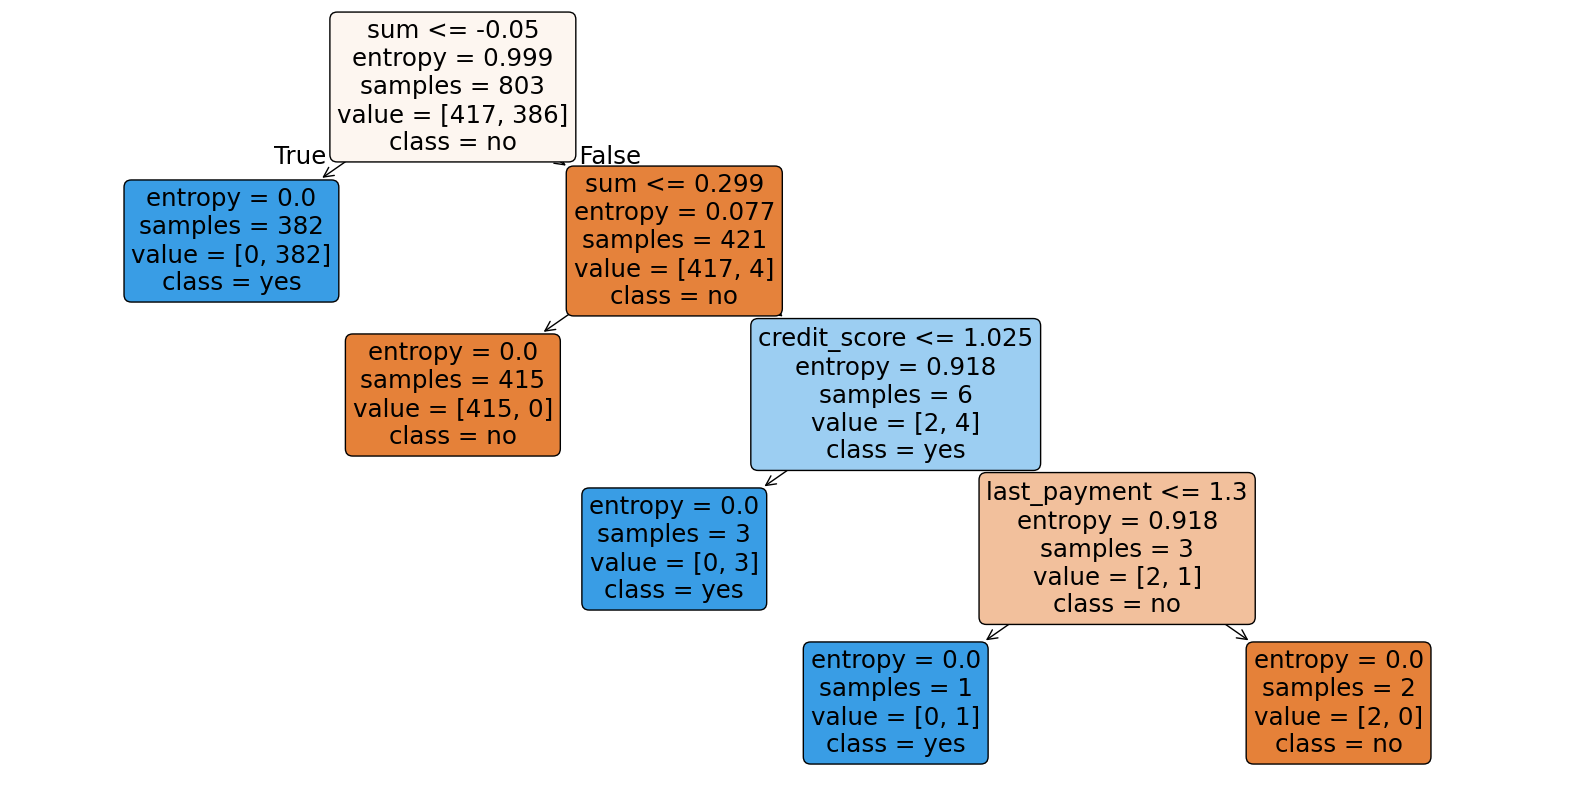

In [52]:
# Visualize the decison tree 

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(
    classifier, 
    feature_names=X_train.columns, 
    class_names=['no', 'yes'], 
    filled=True, 
    rounded=True
)
plt.show()